# Vaex Examples

##### Copyright 2021 Qiyang Hu

In [ ]:
#@title Licensed under MIT License (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://huqy.github.io/HighPerfDataSciPython/LICENSE.md
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Vaex v4 is released, fastest DataFrame library we know of! Instant file opening, subsecond groupby and join on +1,000,000,000 (billion) rows

## Installation Vaex on Colab

You need to restart the session runtime after the pip install commands below under the current version of Colab.

In [1]:
!pip install vaex
!pip install ipython==7.0.0

     |████████████████████████████████| 102kB 4.4MB/s 
     |████████████████████████████████| 2.4MB 8.8MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 11.7MB 15.9MB/s 
     |████████████████████████████████| 3.3MB 50.3MB/s 
     |████████████████████████████████| 112kB 35.0MB/s 
     |████████████████████████████████| 1.2MB 41.0MB/s 
     |████████████████████████████████| 2.9MB 47.5MB/s 
     |████████████████████████████████| 2.7MB 42.4MB/s 
     |████████████████████████████████| 266kB 49.2MB/s 
     |████████████████████████████████| 3.4MB 26.7MB/s 
     |████████████████████████████████| 276kB 50.5MB/s 
  Created wheel for aplus: filename=aplus-0.11.0-cp37-none-any.whl size=4412 sha256=f858279a8f06393ab35bb04e9d98547fd70fb41c30fd8b2f2f0a2b33c9ddb2ad
  Stored in directory: /root/.cache/pip/wheels/77/95/8a/ccc1d85d9cabd162a537be5ad77f95d109170df37b49c0ca21
Successfully built aplus
     |████████████████████████████████| 768kB 5.0M

## Check the default dataset example

The original data is a simulation of the disruption of 33 satellite galaxies in a Galactic potential by Helmi and Zeeuw (2000).  The incorporated dataset in Vaex is a random 10% subset of it containing 330 000 rows and serves well to
demonstrate what can be done with vaex while being reasonably small in size.

*   Helmi, A. & de Zeeuw, P. T. 2000, MNRAS, 319, 657

Most of the cells are copied from [Vaex introduction in 11 minutes](https://vaex.io/docs/tutorial.html).

In [2]:
import vaex
df = vaex.example()
print(df)

#        id    x                     y                     z                     vx                   vy                   vz                   E               L                   Lz                   FeH
0        0     1.2318683862686157    -0.39692866802215576  -0.598057746887207    301.1552734375       174.05947875976562   27.42754554748535    -149431.40625   407.38897705078125  333.9555358886719    -1.0053852796554565
1        23    -0.16370061039924622  3.654221296310425     -0.25490644574165344  -195.00022888183594  170.47216796875      142.5302276611328    -124247.953125  890.2411499023438   684.6676025390625    -1.7086670398712158
2        32    -2.120255947113037    3.326052665710449     1.7078403234481812    -48.63423156738281   171.6472930908203    -2.079437255859375   -138500.546875  372.2410888671875   -202.17617797851562  -1.8336141109466553
3        8     4.7155890464782715    4.5852508544921875    2.2515437602996826    -232.42083740234375  -294.850830078125    62.858650

In [ ]:
!ls -lh /root/.vaex/data/helmi-dezeeuw-2000-FeH-v2-10percent.hdf5

-rw-r--r-- 1 root root 13M Feb 24 15:32 /root/.vaex/data/helmi-dezeeuw-2000-FeH-v2-10percent.hdf5


In [ ]:
df.x  # df.col.x or df['x'] are equivalent, but df.x may be preferred because it is more tab completion friendly or programming friendly respectively

Expression = x
Length: 330,000 dtype: float32 (column)
---------------------------------------
     0    1.23187
     1  -0.163701
     2   -2.12026
     3    4.71559
     4    7.21719
       ...       
329995    1.99387
329996    3.71809
329997   0.368851
329998  -0.112593
329999    20.7962

In [ ]:
df.x.values

array([ 1.2318684 , -0.16370061, -2.120256  , ...,  0.36885077,
       -0.11259264, 20.79622   ], dtype=float32)

In [ ]:
import numpy as np
np.sqrt(df.x**2 + df.y**2 + df.z**2)

Expression = sqrt((((x ** 2) + (y ** 2)) + (z ** 2)))
Length: 330,000 dtype: float32 (expression)
-------------------------------------------
     0  1.42574
     1  3.66676
     2  4.29824
     3  6.95203
     4   14.039
      ...      
329995  2.15587
329996  4.12785
329997  13.5319
329998  2.61304
329999  24.3339

In [ ]:
df['r'] = np.sqrt(df.x**2 + df.y**2 + df.z**2)
print(df[['x', 'y', 'z', 'r']])

#        x                     y                     z                     r
0        1.2318683862686157    -0.39692866802215576  -0.598057746887207    1.425736665725708
1        -0.16370061039924622  3.654221296310425     -0.25490644574165344  3.666757345199585
2        -2.120255947113037    3.326052665710449     1.7078403234481812    4.298235893249512
3        4.7155890464782715    4.5852508544921875    2.2515437602996826    6.952032566070557
4        7.21718692779541      11.99471664428711     -1.064562201499939    14.03902816772461
...      ...                   ...                   ...                   ...
329,995  1.9938701391220093    0.789276123046875     0.22205990552902222   2.155872344970703
329,996  3.7180912494659424    0.721337616443634     1.6415337324142456    4.127851963043213
329,997  0.3688507676124573    13.029608726501465    -3.633934736251831    13.531896591186523
329,998  -0.11259264498949051  1.4529125690460205    2.168952703475952     2.613041877746582
329,99

Storing an expression as a column is called a virtual column since it does **not** take up any memory, and is computed on the fly when needed. A virtual column is treated just as a normal column.

In [ ]:
df.select(df.x < 0)
df.evaluate(df.x, selection=True)

array([-0.16370061, -2.120256  , -7.7843747 , ..., -8.126636  ,
       -3.9477386 , -0.11259264], dtype=float32)

In [ ]:
df_negative = df[df.x < 0]
print(df_negative[['x', 'y', 'z', 'r']])

#        x                     y                    z                     r
0        -0.16370061039924622  3.654221296310425    -0.25490644574165344  3.666757345199585
1        -2.120255947113037    3.326052665710449    1.7078403234481812    4.298235893249512
2        -7.784374713897705    5.989774703979492    -0.682695209980011    9.845809936523438
3        -3.5571861267089844   5.413629055023193    0.09171556681394577   6.478376865386963
4        -20.813940048217773   -3.294677495956421   13.486607551574707    25.019264221191406
...      ...                   ...                  ...                   ...
166,274  -2.5926425457000732   -2.871671676635742   -0.18048334121704102  3.8730955123901367
166,275  -0.7566012144088745   2.9830434322357178   -6.940553188323975    7.592250823974609
166,276  -8.126635551452637    1.1619765758514404   -1.6459038257598877   8.372657775878906
166,277  -3.9477386474609375   -3.0684902667999268  -1.5822702646255493   5.244411468505859
166,278  -0.1125

In [ ]:
df.count(), df.mean(df.x), df.mean(df.x, selection=True)

(array(330000), array(-0.0632868), array(-5.18457762))

In [ ]:
counts_x = df.count(binby=df.x, limits=[-10, 10], shape=64)
counts_x

array([1374, 1350, 1459, 1618, 1706, 1762, 1852, 2007, 2240, 2340, 2610,
       2840, 3126, 3337, 3570, 3812, 4216, 4434, 4730, 4975, 5332, 5800,
       6162, 6540, 6805, 7261, 7478, 7642, 7839, 8336, 8736, 8279, 8269,
       8824, 8217, 7978, 7541, 7383, 7116, 6836, 6447, 6220, 5864, 5408,
       4881, 4681, 4337, 4015, 3799, 3531, 3320, 3040, 2866, 2629, 2488,
       2244, 1981, 1905, 1734, 1540, 1437, 1378, 1233, 1186])

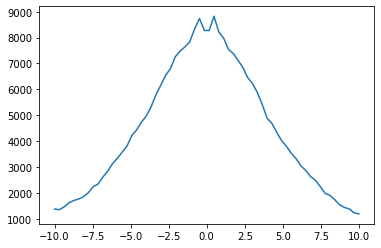

In [ ]:
import matplotlib.pylab as plt
plt.plot(np.linspace(-10, 10, 64), counts_x)
plt.show()

In [ ]:
xycounts = df.count(binby=[df.x, df.y], limits=[[-10, 10], [-10, 20]], shape=(64, 128))
xycounts

array([[ 5,  2,  3, ...,  3,  3,  0],
       [ 8,  4,  2, ...,  5,  3,  2],
       [ 5, 11,  7, ...,  3,  3,  1],
       ...,
       [ 4,  8,  5, ...,  2,  0,  2],
       [10,  6,  7, ...,  1,  1,  2],
       [ 6,  7,  9, ...,  2,  2,  2]])

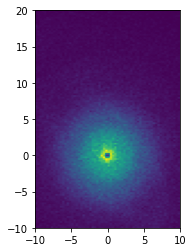

In [ ]:
plt.imshow(xycounts.T, origin='lower', extent=[-10, 10, -10, 20])
plt.show()

In [ ]:
v = np.sqrt(df.vx**2 + df.vy**2 + df.vz**2)
xy_mean_v = df.mean(v, binby=[df.x, df.y], limits=[[-10, 10], [-10, 20]], shape=(64, 128))
xy_mean_v

array([[156.15283203, 226.0004425 , 206.95940653, ...,  90.0340627 ,
        152.08784485,          nan],
       [203.81366634, 133.01436043, 146.95962524, ..., 137.54756927,
         98.68717448, 141.06020737],
       [150.59178772, 188.38820371, 137.46753802, ..., 155.96900177,
        148.91660563, 138.48191833],
       ...,
       [168.93819809, 187.75943136, 137.318647  , ..., 144.83927917,
                 nan, 107.7273407 ],
       [154.80492783, 140.55182203, 180.30700166, ..., 184.01670837,
         95.10913086, 131.18122864],
       [166.06868235, 150.54079764, 125.84606828, ..., 130.56007385,
        121.04217911, 113.34659195]])

## Getting your data in

In [ ]:
import vaex
import numpy as np
x = np.arange(5)
y = x**2
df = vaex.from_arrays(x=x, y=y)
print(df)

  #    x    y
  0    0    0
  1    1    1
  2    2    4
  3    3    9
  4    4   16


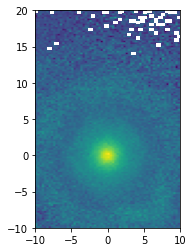

In [ ]:
plt.imshow(xy_mean_v.T, origin='lower', extent=[-10, 10, -10, 20])
plt.show()

## Vaex 4.0 New Features

### With Apache Arrow Arrays

In [ ]:
import vaex
import numpy as np
import pyarrow as pa

In [ ]:
df = vaex.from_arrays(library=['Vaex', 'NumPy', 'Apache Arrow'])
print(df)

  #  library
  0  'Vaex'
  1  'NumPy'
  2  'Apache Arrow'


In [ ]:
print(repr(df['library'].values))

[
  "Vaex",
  "NumPy",
  "Apache Arrow"
]


In [ ]:
# mixing Arrow and Numpy
x  = np.arange(4)
y = pa.array([42, 12, 144, 1024])

df = vaex.from_arrays(x=x, y=y)
df['y'] = df.x * df.y
print(repr(df.y))

Expression = y
Length: 4 dtype: int64 (column)
-------------------------------
0     0
1    12
2   288
3  3072


In [ ]:
# By default, Arrow takes a Pandas-like approach of converting mmissing values to NaN when mixing with Numpy
x = np.ma.array(np.arange(4), mask=[0, 1, 0, 0], dtype='i4')
y = pa.array([42, 12, 144, None], type=pa.int32())
print(x*y)

[0.0 -- 288.0 nan]


In [ ]:
# Vaex ensures the missing values stay missing and arrays do not get upcasted.
df = vaex.from_arrays(x=x, y=y)
df['y'] = df.x * df.y
print(repr(df.y))

Expression = y
Length: 4 dtype: int32 (column)
-------------------------------
0    0
1   --
2  288
3   --


In [ ]:
df = vaex.from_arrays(text=['So, can you split this?', 'And this.', None])
df.text.str.split(" ")

Expression = str_split(text, ' ')
Length: 3 dtype: list<item: string> (expression)
------------------------------------------------
0  ['So,', 'can', 'you', 'split', 'this?']
1                         ['And', 'this.']
2                                       --

In [ ]:
# apply string operations to each string in the list
df.text.str.split(" ").str.strip(' ,?.')

Expression = str_strip(str_split(text, ' '), ' ,?.')
Length: 3 dtype: list<item: string> (expression)
------------------------------------------------
0  ['So', 'can', 'you', 'split', 'this']
1                        ['And', 'this']
2                                     --

In [ ]:
# String splitting can even be done multiple times creating a nested list without any performance loss.
df.text.str.split(" ").str.strip(' ,?.').str.split('a')

Expression = str_split(str_strip(str_split(text, ' '), ' ,?.'), 'a')
Length: 3 dtype: list<item: list<item: string>> (expression)
------------------------------------------------------------
0  [['So'], ['c', 'n'], ['you'], ['split'], ['this']]
1                                 [['And'], ['this']]
2                                                  --

### With Apache Parquet Support

In [ ]:
import vaex

In [ ]:
countries = ['US', 'US', 'NL', 'FR', 'NL', 'NL']
years = [2020, 2021, 2020, 2020, 2019, 2020]
values = [1, 2, 3, 4, 5, 6]

In [ ]:
df = vaex.from_dict({
    'country': countries,
    'year': years,
    'value': values
})
df.export_partitioned('./partitioned', by=['country', 'year'])

In [ ]:
!ls -R ./partitioned/

./partitioned/:
'country=FR'  'country=NL'  'country=US'

'./partitioned/country=FR':
'year=2020'

'./partitioned/country=FR/year=2020':
bb5e981d-a1d2-4976-be8a-82647fca3042.parquet
f29a162e-e0e6-4b08-8529-75b424cad5b0.parquet

'./partitioned/country=NL':
'year=2019'  'year=2020'

'./partitioned/country=NL/year=2019':
1f052a1c-6670-4fa4-9700-f0a25149e4f1.parquet
4861225a-6201-4aeb-9e86-9815e4e26e62.parquet

'./partitioned/country=NL/year=2020':
d08356e8-0ffb-4b67-96c5-4fef2a35c128.parquet
f2e2eb19-6d22-449e-b53c-620b04846260.parquet

'./partitioned/country=US':
'year=2020'  'year=2021'

'./partitioned/country=US/year=2020':
504f8f14-c15d-40c2-af23-4904c3999403.parquet
98658faa-5544-4da8-8811-2817104c2cb8.parquet

'./partitioned/country=US/year=2021':
a9b23009-700c-4559-ac2b-6d5206f620e8.parquet
fd77fd69-5d96-424f-8b45-2519681f9a04.parquet


In [ ]:
df = vaex.open('./partitioned')
print(df)

#    value    country    year
0    4        'FR'       2020
1    4        'FR'       2020
2    5        'NL'       2019
3    5        'NL'       2019
4    3        'NL'       2020
...  ...      ...        ...
7    6        'NL'       2020
8    1        'US'       2020
9    1        'US'       2020
10   2        'US'       2021
11   2        'US'       2021


## Stretching Colab to handle BIG data

* Read 100+GB file with 1 billion rows
* For demo, just processing 20% of it which still has 20+GB with 200 million rows

In [7]:
import vaex

In [8]:
# Read in the NYC Taxi dataset straight from S3
# Lazy streaming from S3 supported in combination with memory mapping.
%%time
df = vaex.open('s3://vaex/taxi/yellow_taxi_2009_2015_f32.hdf5?anon=true') # open a 100+G file, 1 billion+ rows
print(df)

#              vendor_id    pickup_datetime                dropoff_datetime               passenger_count    payment_type    trip_distance       pickup_longitude    pickup_latitude     rate_code    store_and_fwd_flag    dropoff_longitude    dropoff_latitude    fare_amount         surcharge    mta_tax    tip_amount          tolls_amount    total_amount
0              VTS          2009-01-04 02:52:00.000000000  2009-01-04 03:02:00.000000000  1                  CASH            2.630000114440918   -73.99195861816406  40.72156524658203   nan          nan                   -73.99380493164062   40.6959228515625    8.899999618530273   0.5          nan        0.0                 0.0             9.399999618530273
1              VTS          2009-01-04 03:31:00.000000000  2009-01-04 03:38:00.000000000  3                  Credit          4.550000190734863   -73.98210144042969  40.736289978027344  nan          nan                   -73.95584869384766   40.768028259277344  12.100000381469727  0.5   

In [9]:
# lets use just 20% of the data, since we want to make sure it fits
# into memory (so we don't measure just hdd/ssd speed)
%%time
df.set_active_fraction(0.2)
print(df)

#            vendor_id    pickup_datetime                dropoff_datetime               passenger_count    payment_type    trip_distance       pickup_longitude    pickup_latitude     rate_code    store_and_fwd_flag    dropoff_longitude    dropoff_latitude    fare_amount         surcharge    mta_tax    tip_amount         tolls_amount    total_amount
0            VTS          2009-01-04 02:52:00.000000000  2009-01-04 03:02:00.000000000  1                  CASH            2.630000114440918   -73.99195861816406  40.72156524658203   nan          nan                   -73.99380493164062   40.6959228515625    8.899999618530273   0.5          nan        0.0                0.0             9.399999618530273
1            VTS          2009-01-04 03:31:00.000000000  2009-01-04 03:38:00.000000000  3                  Credit          4.550000190734863   -73.98210144042969  40.736289978027344  nan          nan                   -73.95584869384766   40.768028259277344  12.100000381469727  0.5          n

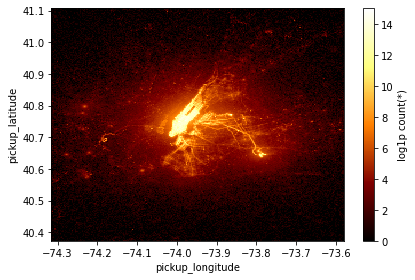

In [ ]:
df.plot(df.col.pickup_longitude, df.col.pickup_latitude, f="log1p", show=True, limits="96%");

In [ ]:
df['tip_percentage'] = df.tip_amount / df.total_amount
df['tip_percentage']

Expression = tip_percentage
Length: 234,611,585 dtype: float32 (column)
-------------------------------------------
        0         0
        1  0.136986
        2  0.166667
        3  0.165312
        4         0
        ...        
234611580         0
234611581     0.125
234611582   0.13245
234611583         0
234611584         0

Filtering and evaluating expressions will not waste memory by making copies; the data is kept untouched on disk, and will be streamed only when needed. Delay the time before you need a cluster.

In [ ]:
dff = df[df.total_amount > 0]

In [ ]:
dff.tip_amount.mean(progress='widget')

array(0.61493081)

In [ ]:
f"{len(dff):,} rows filtered and processed"

'234,580,894 rows filtered and processed'

In [ ]:
%%time
df_group = df.groupby(dff.passenger_count, agg=vaex.agg.mean(df.tip_amount))

CPU times: user 14 s, sys: 4.25 s, total: 18.2 s
Wall time: 1min 45s


In [ ]:
%%time
df_joined = df.extract().join(df_group, on='passenger_count') # no memory copies
print(df_joined['passenger_count', 'tip_amount', 'tip_amount_mean'])

#            passenger_count    tip_amount         tip_amount_mean
0            1                  0.0                0.6258832207232858
1            3                  2.0                0.4980706052978914
2            5                  4.739999771118164  0.6461222850436364
3            1                  3.049999952316284  0.6258832207232858
4            1                  0.0                0.6258832207232858
...          ...                ...                ...
234,611,580  1                  0.0                0.6258832207232858
234,611,581  2                  1.0                0.5279643993373218
234,611,582  1                  2.0                0.6258832207232858
234,611,583  1                  0.0                0.6258832207232858
234,611,584  1                  0.0                0.6258832207232858
CPU times: user 1.61 s, sys: 9.93 ms, total: 1.62 s
Wall time: 3.51 s


## Just-In-Time compilation

The heavy calculation can be optimized by doing a Just-In-Time compilation, based on numba, pythran, or if you happen to have an NVIDIA graphics card cuda. Choose whichever gives the best performance or is easiest to install.

[Link](https://vaex.readthedocs.io/en/latest/tutorial.html#Just-In-Time-compilation)

In [10]:
import numpy as np
# From http://pythonhosted.org/pythran/MANUAL.html
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    """
    Calculates the pairwise arc distance
    between all points in vector a and b.
    """
    temp = (np.sin((theta_2-2-theta_1)/2)**2
           + np.cos(theta_1)*np.cos(theta_2) * np.sin((phi_2-phi_1)/2)**2)
    distance_matrix = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance_matrix

In [11]:
df['arc_distance'] = arc_distance(df.pickup_longitude * np.pi/180,
                                  df.pickup_latitude * np.pi/180,
                                  df.dropoff_longitude * np.pi/180,
                                  df.dropoff_latitude * np.pi/180)

In [12]:
%%time
df.mean(df.arc_distance)

/usr/local/lib/python3.7/dist-packages/vaex/functions.py:178: RuntimeWarning: invalid value encountered in sqrt
  result = function(*numpy_data, **kwargs)


CPU times: user 1min 14s, sys: 11.3 s, total: 1min 26s
Wall time: 1min 32s


array(1.99993282)

### Using Cuda GPU

In [13]:
df['arc_distance_jit'] = df.arc_distance.jit_cuda()

In [14]:
%%time
df.mean(df.arc_distance_jit)

CPU times: user 3.29 s, sys: 51.3 ms, total: 3.34 s
Wall time: 1.79 s


array(1.99993285)

### Using Numba

In [15]:
df['arc_distance_jit'] = df.arc_distance.jit_numba()

In [16]:
%%time
df.mean(df.arc_distance_jit)

/usr/local/lib/python3.7/dist-packages/vaex/expression.py:1195: RuntimeWarning: invalid value encountered in f
  return self.f(*args, **kwargs)


CPU times: user 34.8 s, sys: 49.4 ms, total: 34.9 s
Wall time: 17.8 s


array(1.9999328)

### Using Pythran

In [17]:
!apt-get install libatlas-base-dev
!apt-get install python-dev python-ply python-networkx python-numpy
!pip install pythran

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libatlas-base-dev is already the newest version (3.10.3-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
python-numpy is already the newest version (1:1.13.3-2ubuntu1).
python-numpy set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-decorator python-pkg-resources python-yaml
Suggested packages:
  python-matplotlib python-pydotplus python-scipy python-pygraphviz
  | python-pydot python-setuptools python-ply-doc
The follow

In [18]:
df['arc_distance_jit'] = df.arc_distance.jit_pythran()

In [19]:
%%time
df.mean(df.arc_distance_jit)

CPU times: user 59.6 s, sys: 51.2 ms, total: 59.7 s
Wall time: 30.3 s


array(1.9999328)

### Compare the performance

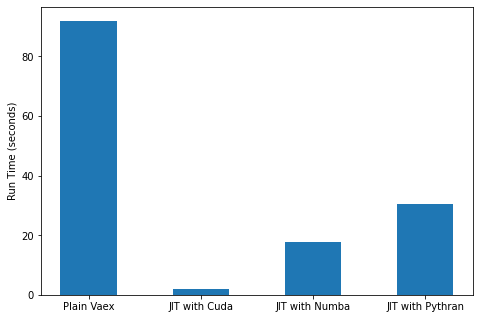

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
vaex_comp = ['Plain Vaex', 'JIT with Cuda', 'JIT with Numba', 'JIT with Pythran']
time = [92,1.79,17.8,30.3]
ax.bar(vaex_comp,time, width=0.5)
ax.set_ylabel('Run Time (seconds)')
plt.show()